In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from scipy.optimize import curve_fit
from scipy import stats

In [11]:
def load(data):
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13])  
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:4]
    return mean2

In [12]:
gain_reps = 11; concentration = []; col = []
arr_ = np.zeros((7, gain_reps))

for j in range(7):
    initial = 10 / 2**4
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Fluostar data\\f TR 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 700
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]


df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

             700      750       800       850       900       950       1000  \
0.625000  634.375  657.500  1233.875  1407.125  2290.375  2769.875  4103.125   
0.312500  344.375  241.625   664.125   529.250  1184.750  1063.750  2001.375   
0.156250  202.000  141.875   395.375   305.125   715.625   624.750  1227.000   
0.078125  113.000   88.750   223.250   191.875   416.125   394.875   725.625   
0.039062   62.875   52.875   126.125   114.125   235.375   235.750   417.250   
0.019531   32.000   27.500    65.375    58.625   120.875   121.125   213.500   
0.009766   16.375   15.250    34.250    30.500    61.875    62.750   114.125   

              1050      1100      1150       1200  
0.625000  5179.875  7137.125  9125.750  11965.750  
0.312500  2028.750  3300.625  3716.250   5216.250  
0.156250  1207.875  2021.750  2243.750   3182.375  
0.078125   759.875  1222.125  1392.000   1948.875  
0.039062   450.125   708.875   834.500   1138.625  
0.019531   235.500   362.625   431.625    586.0

0.9987094495361634
0.9822204226716306
0.97922742130066
0.9860189473226754
0.990034397010888
0.9912122590712573
0.9892022361281835


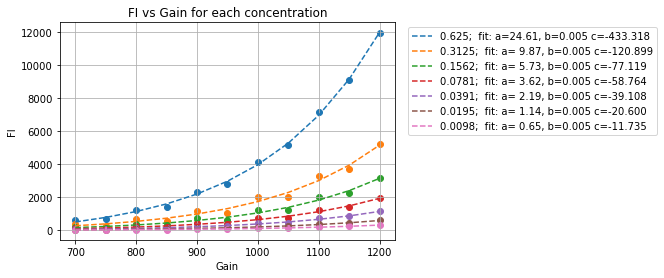

0.0052250624518363166


In [4]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

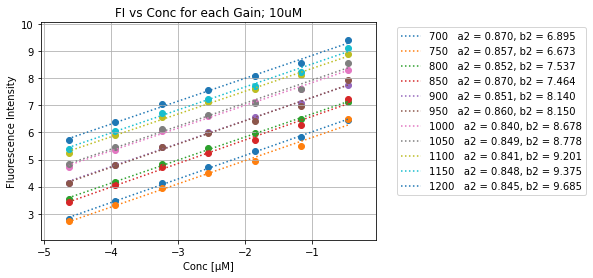

0.8528049882992831


In [7]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 700) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))
    
    
plt.title('FI vs Conc for each Gain; 10uM'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

29.951202696805417 0.005255078387792676 -422.34019683445473 
 
 0.9915427840734752


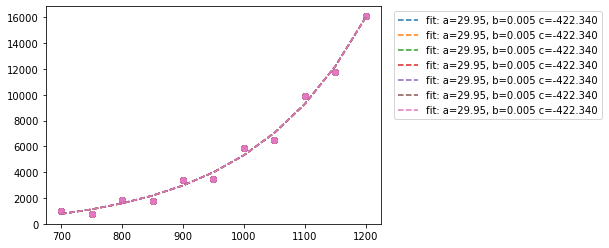

In [14]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b2_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

plt.legend(bbox_to_anchor=(1.025, 1))
    

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9, '\n','\n', r_squared1_1)

                700         750          800          850          900   \
0.625000  511.303620  749.958267  1060.330223  1463.971016  1988.908552   
0.312500  283.112461  415.257242   587.112408   810.611194  1101.272852   
0.156250  156.761389  229.930897   325.088328   448.841200   609.782633   
0.078125   86.799899  127.314378   180.003726   248.526574   337.640993   
0.039062   48.061723   70.494879    99.669347   137.610937   186.954226   
0.019531   26.612119   39.033517    55.187628    76.196157   103.517889   
0.009766   14.735320   21.613137    30.557783    42.190356    57.318593   

                 950          1000         1050         1100         1150  \
0.625000  2671.593308  3559.429373  4714.066079  6215.678795  8168.536117   
0.312500  1479.280270  1970.881432  2610.212012  3441.665684  4522.976712   
0.156250   819.088037  1091.291107  1445.293009  1905.674838  2504.404467   
0.078125   453.534889   604.255670   800.269048  1055.185750  1386.706617   
0.039062   251

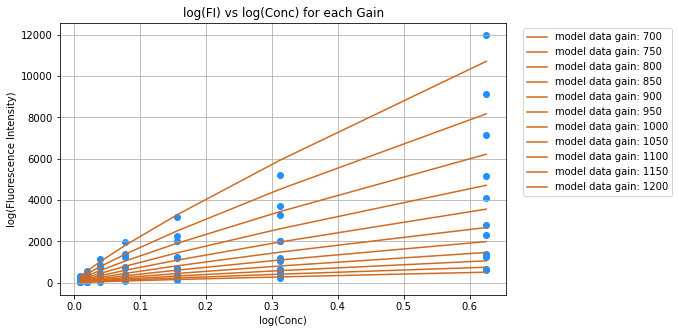

In [9]:
model = list(df.index)
model = np.array(model, dtype = float); model_array = []; index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 700
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 700
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y, c = 'dodgerblue')
    plt.plot(x_model, y_model, linewidth = 1.5, c = 'chocolate', label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.025, 1)); plt.grid()
    
plt.show()

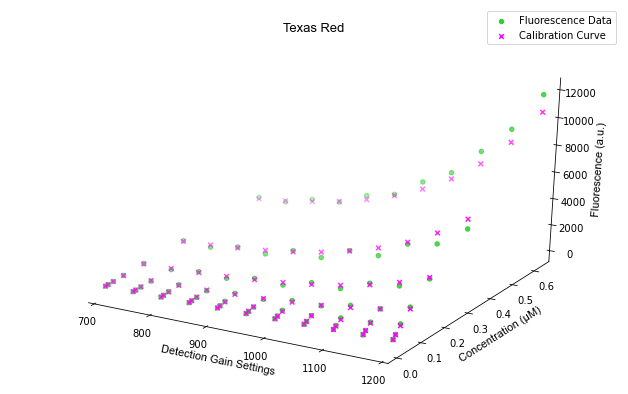

In [10]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='limegreen', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='magenta', marker='x')

ax.set_title('Texas Red', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(700,1200)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

# plt.savefig('Fluostar Texas Red 3D.png', dpi=300)

plt.show()

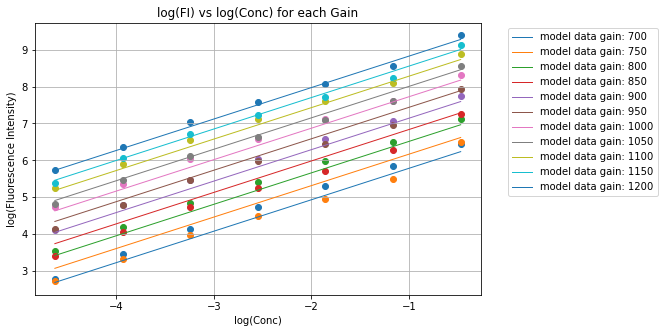

Model dataframe: 
 
                 700         750          800          850          900   \
0.625000  511.303620  749.958267  1060.330223  1463.971016  1988.908552   
0.312500  283.112461  415.257242   587.112408   810.611194  1101.272852   
0.156250  156.761389  229.930897   325.088328   448.841200   609.782633   
0.078125   86.799899  127.314378   180.003726   248.526574   337.640993   
0.039062   48.061723   70.494879    99.669347   137.610937   186.954226   
0.019531   26.612119   39.033517    55.187628    76.196157   103.517889   
0.009766   14.735320   21.613137    30.557783    42.190356    57.318593   

                 950          1000         1050         1100         1150  \
0.625000  2671.593308  3559.429373  4714.066079  6215.678795  8168.536117   
0.312500  1479.280270  1970.881432  2610.212012  3441.665684  4522.976712   
0.156250   819.088037  1091.291107  1445.293009  1905.674838  2504.404467   
0.078125   453.534889   604.255670   800.269048  1055.185750  1386.706

In [20]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 700
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain'); plt.xlabel('log(Conc)'); plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1)); plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)

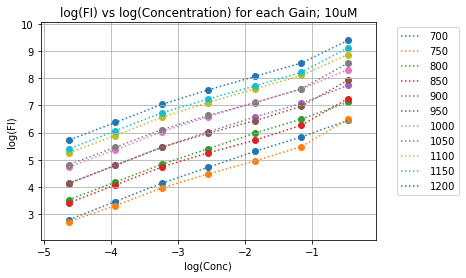

In [21]:
# for i in range(df.shape[1]): 
#     x2 = df.index
#     y2 = np.array(df.iloc[:, i])   
    
#     plt.scatter(np.log(x2), np.log(y2)) 
#     plt.plot(np.log(x2), np.log(y2), ':', label = str(50*i + 700))

# plt.title('log(FI) vs log(Concentration) for each Gain; 10uM'); plt.xlabel('log(Conc)'); plt.ylabel('log(FI)')
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
    
# plt.show()